# COMP 494 Final Project

**Author:** Hiromi Gonzalez, Camden Engstrom, Jacob Weil, Nic Harrison, Enrique Garza

**Date:** May 22, 2023

### Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

The dataset is ordered by date (from May 2008 to November 2010).


## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

## Data Importing and Pre-processing <a class="anchor" id="data-importing"></a>

In [139]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [75]:
# read in file
df = pd.read_csv('bank_marketing.csv', sep=";")

In [76]:
df.default.value_counts()

no     43113
yes      792
Name: default, dtype: int64

In [77]:
#check number of rows and columns
df.shape #45,211 rows and 17 columns

(45211, 17)

In [78]:
#count the number of categorical variables
cat_count = 0
for dtype in df.dtypes:
    if dtype == 'object':
        cat_count = cat_count + 1

In [79]:
print('# of categorical variables:',cat_count)
print('# of continuous variables:',df.shape[1] - cat_count)

# of categorical variables: 10
# of continuous variables: 7


In [80]:
#check the column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [83]:
# checking data types of each columns
column_data_types = df.dtypes
print(column_data_types)

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object


### Handling missing data

In [81]:
#missing data (as percentages)
cleaned_df = df
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
contact,1383,0.030590
age,1339,0.029617
default,1306,0.028887
marital,0,0.000000
education,0,0.000000
balance,0,0.000000
housing,0,0.000000
loan,0,0.000000
job,0,0.000000
day,0,0.000000


In [82]:
# Find the number of nulls for each column
null_counts = df.isnull().sum()
print(null_counts)

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64


In [84]:
# inserting the average age of column into the null values of age
average_age =df['age'].mean()
cleaned_df['age'].fillna(average_age, inplace=True)

In [85]:
# assigning "unknown" to all contact that have null values
cleaned_df['contact'].fillna("unknown", inplace=True)

In [86]:
# assigning "no" to all values in default column that are NaN
cleaned_df['default'].fillna("no", inplace=True)

In [87]:
null_counts = cleaned_df.isnull().sum()
print(null_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [88]:
cleaned_df.shape

(45211, 17)

### Handling Outliers

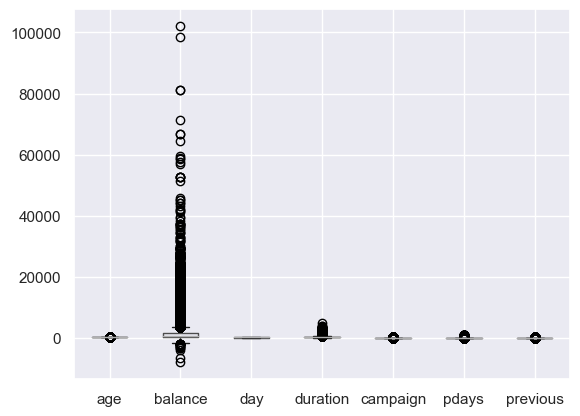

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.452521,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [91]:
# create boxplot showing all the outliers
cleaned_df.boxplot()
plt.show()
cleaned_df.describe()

In [92]:
# do not remove outliers
cleaned_without_outliers_df = cleaned_df.copy()



In [94]:
summary_stats = df.describe()

print(summary_stats)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.924781    1362.272058     15.806419    258.163080      2.763841   
std       10.452521    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

### Making necessary columns to be binary values

In [95]:
# changing deposit to binary variable (no==0, yes==1)
cleaned_without_outliers_df['deposit'] = cleaned_df['deposit'].map({'no': 0, 'yes': 1})

In [96]:
# chaning other categorical variables to be binary (no==0, yes==1)
cleaned_without_outliers_df['default'] = cleaned_df['default'].map({'no': 0, 'yes': 1})
cleaned_without_outliers_df['housing'] = cleaned_df['housing'].map({'no': 0, 'yes': 1})
cleaned_without_outliers_df['loan'] = cleaned_df['loan'].map({'no': 0, 'yes': 1})

In [97]:
cleaned_without_outliers_df['housing'].head(5)

0    1
1    1
2    1
3    1
4    0
Name: housing, dtype: int64

**Finished data cleaning of the Bank_Marketing.csv file - moving onto analysis now**

## Data Analysis and Visualization <a class="anchor" id="data-vis"></a>

In [100]:
# installing necessary libraries/modules

In [101]:
!pip3 install xgboost

In [24]:
cleaned_without_outliers_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44.0,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33.0,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47.0,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33.0,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


### Encoding

In [109]:
# label encoding
cleaned_without_outliers_df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [110]:
# one hot encoding 
cleaned_without_outliers_df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [111]:
# one hot encode
cleaned_without_outliers_df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [112]:
# one hot encode 
cleaned_without_outliers_df.contact.value_counts()

cellular     28410
unknown      13992
telephone     2809
Name: contact, dtype: int64

In [113]:
# manually label them and sure labels are in the proper order
cleaned_without_outliers_df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [114]:
# one hot encode 
cleaned_without_outliers_df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [115]:
# try to predict depost column
# based on the info we have we are trying to predict if they will make a deposit

In [116]:
new_df = cleaned_without_outliers_df.copy()

In [117]:
# look up Classifier rather then regression, the different 
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44.0,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33.0,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47.0,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33.0,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [118]:
month_labels = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

new_df['month'] = new_df['month'].map(month_labels)

In [119]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44.0,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33.0,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47.0,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33.0,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [120]:
encoder = LabelEncoder()
new_df['job'] = encoder.fit_transform(new_df['job'])

In [121]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,4,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44.0,9,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33.0,2,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47.0,1,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33.0,11,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [122]:
new_df = pd.get_dummies(new_df, columns=['marital', 'education', 'contact','poutcome'])

In [123]:
new_df.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,4,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44.0,9,0,29,1,0,5,5,151,1,...,1,0,0,0,0,1,0,0,0,1
2,33.0,2,0,2,1,1,5,5,76,1,...,1,0,0,0,0,1,0,0,0,1
3,47.0,1,0,1506,1,0,5,5,92,1,...,0,0,1,0,0,1,0,0,0,1
4,33.0,11,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


**Target Variable Scatterplots**

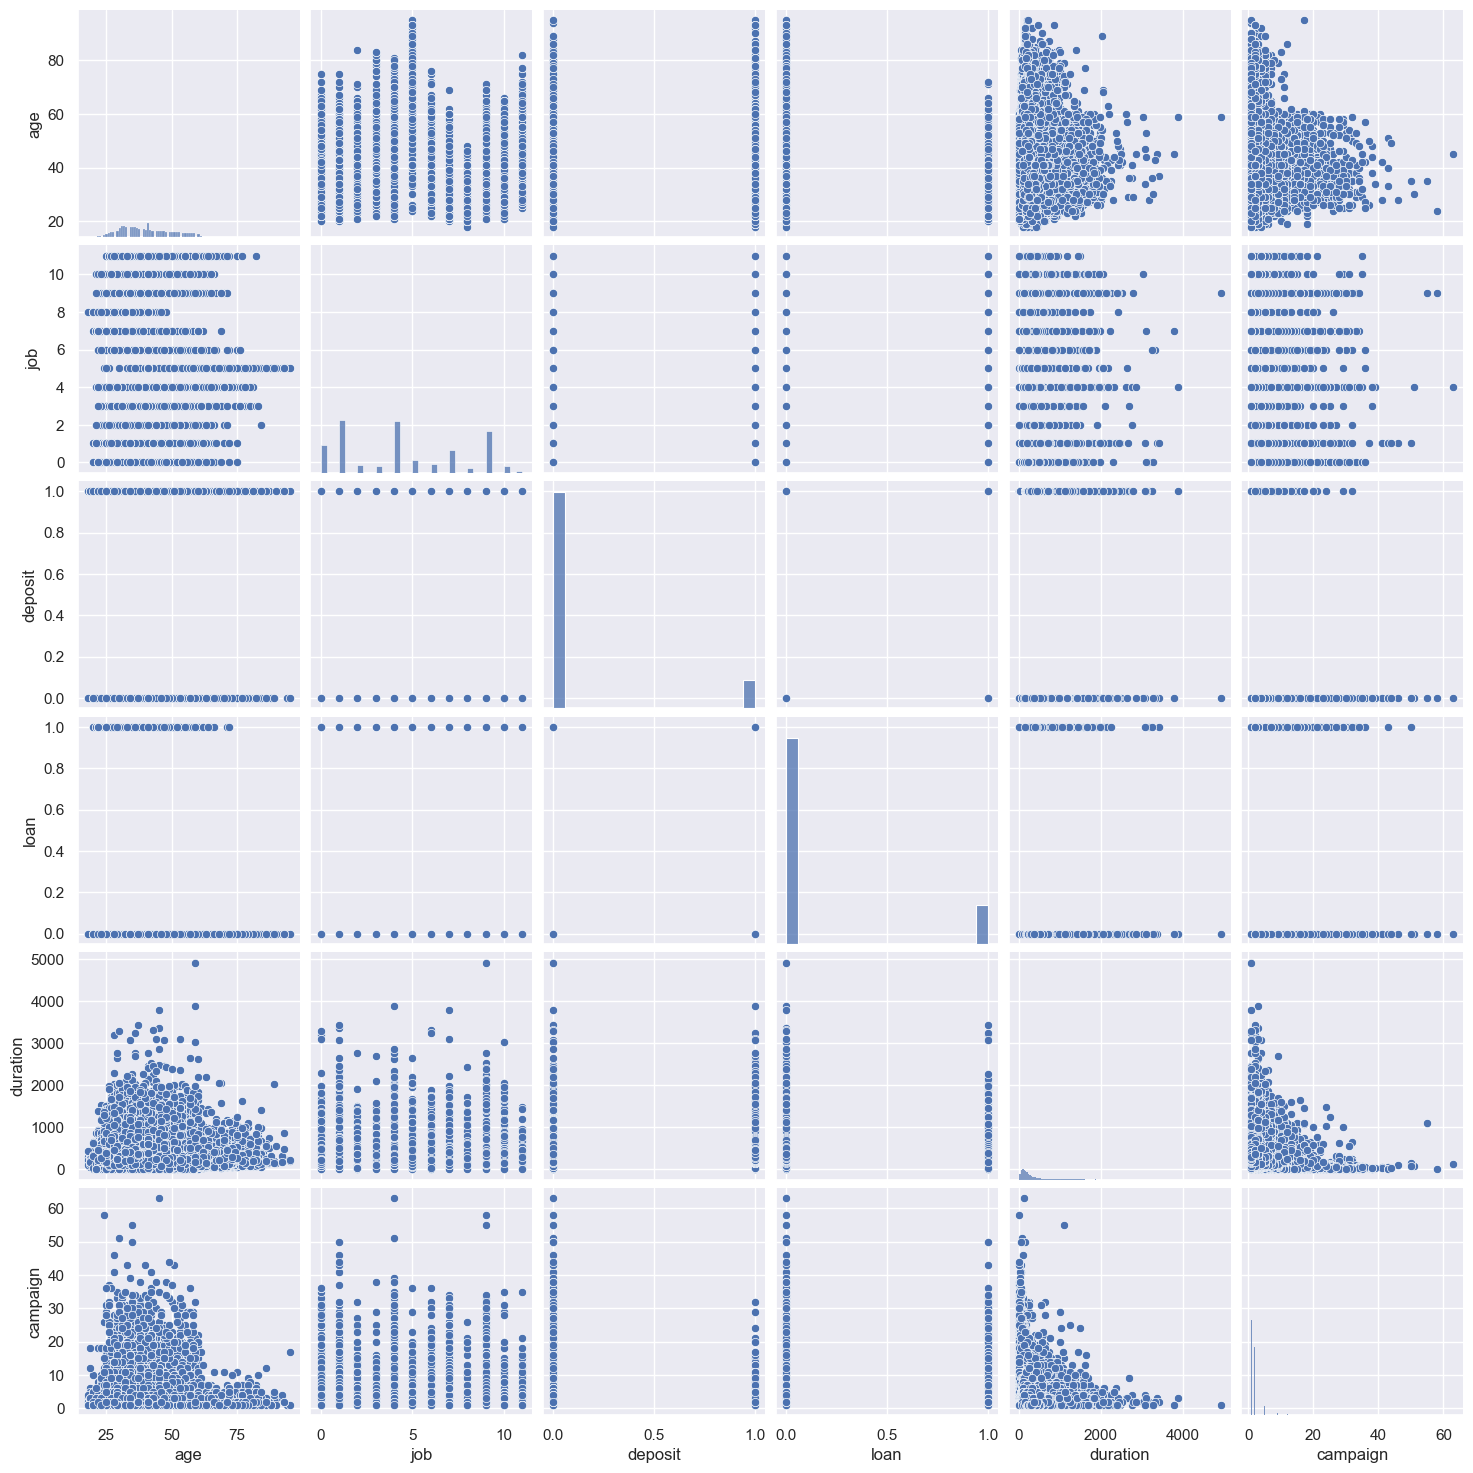

In [124]:
sns.set()
cols = ['age', 'job','default','housing','loan','day','month','duration','campaign','education_secondary', 
       'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
sns.pairplot(new_df[['age', 'job', 'deposit', 'loan', 'duration', 'campaign']], height = 2.5)
plt.show()
# the more people that were ina. campaign were more likely to open a deposit


**Correlation Matrix**

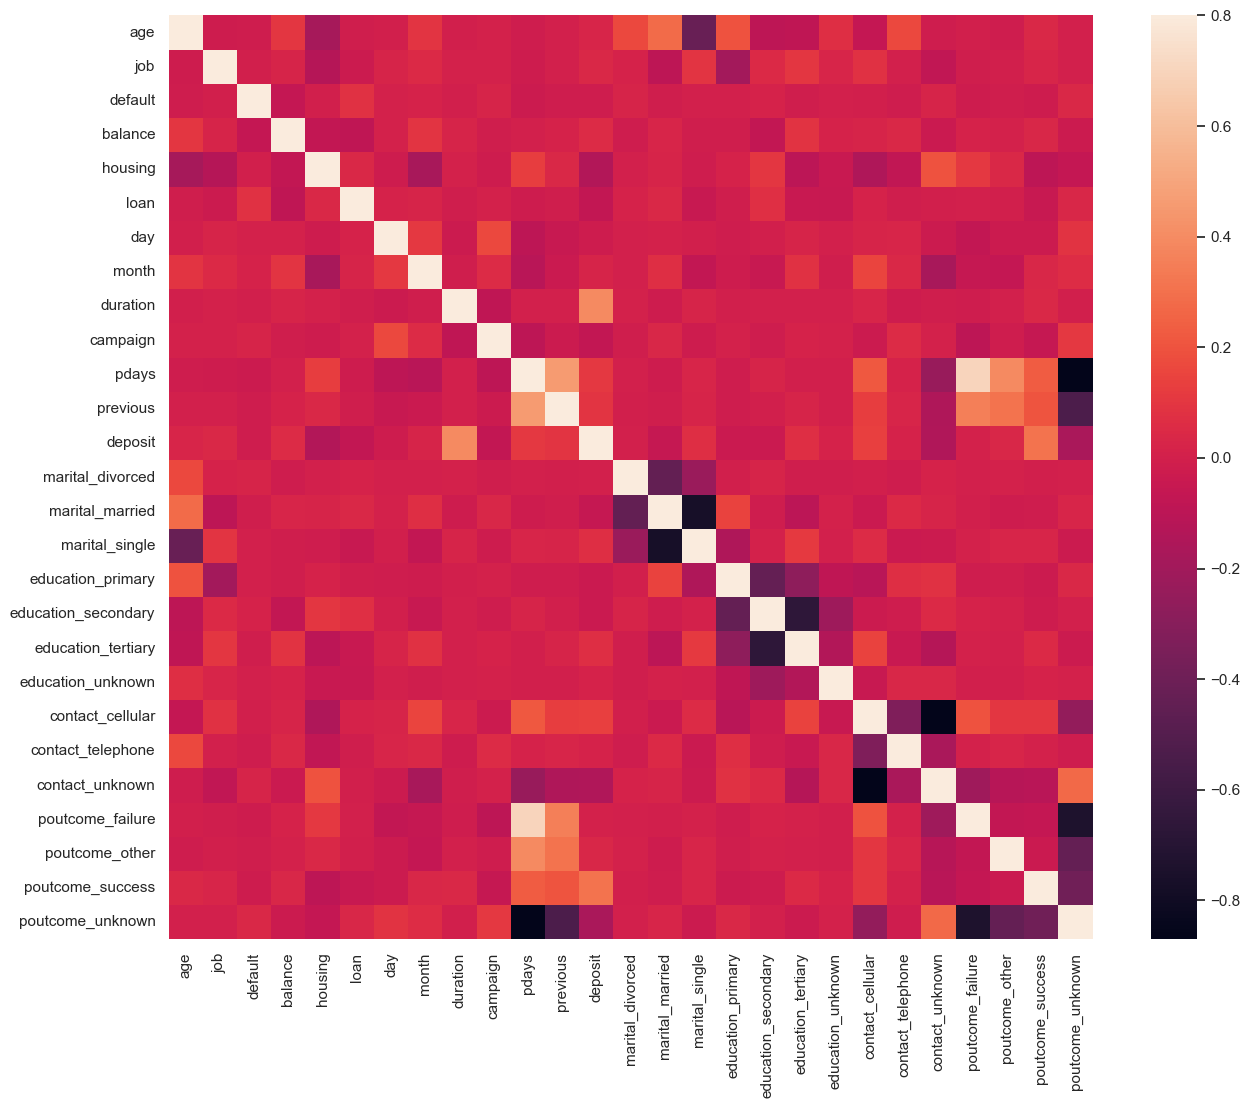

In [126]:
#Correlation map to see how features are correlated deposite
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

**Logistic Regression**

In [133]:
# Split the data into features (X) and the target variable (y)
X = new_df[['age', 'job','default','housing','loan','duration','campaign','education_secondary', 
       'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']]
y = new_df[['deposit']]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
model = LogisticRegression()

In [136]:
model.fit(X_train, y_train)

/Users/hiromigonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hiromigonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7758  194]
 [ 747  344]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.64      0.32      0.42      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043



These metrics indicate that the model performs better for predicting when there won't be a deposit (0), as it has higher precision, recall, and F1-score compared to predicting when there will be a deposit (1). 

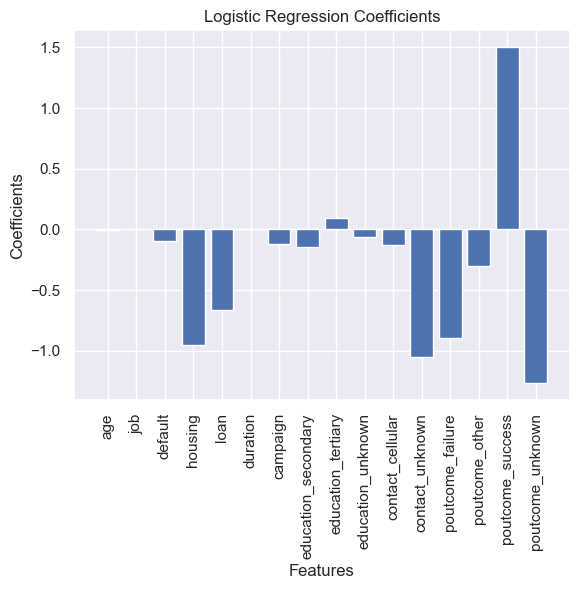

In [148]:
# Get the coefficients and their corresponding feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a bar plot
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability
plt.show()


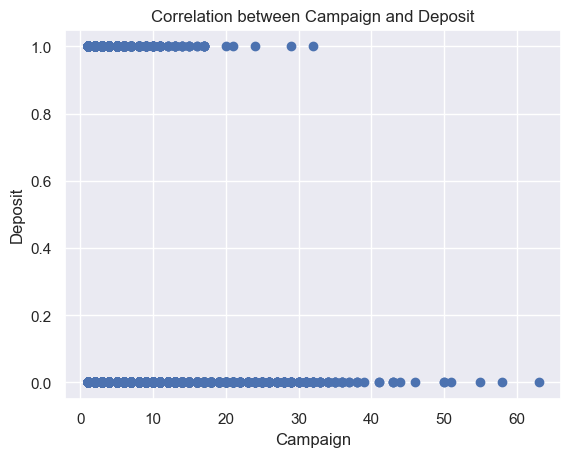

In [46]:
deposit = new_df['deposit']
campaign = new_df['campaign']
plt.scatter(campaign, deposit)
plt.xlabel('Campaign')
plt.ylabel('Deposit')
plt.title('Correlation between Campaign and Deposit')
plt.show()

## Data Analytics <a class="anchor" id="data-analytics"></a>

In [149]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.metrics import accuracy_score

##### Init classifier
xgb_cl = xgb.XGBClassifier()

##### Fit
xgb_cl.fit(X_train, y_train)

#### Predict
preds = xgb_cl.predict(X_test)

In [150]:
X = new_df[['age', 'job','default','housing','loan','duration','campaign','education_secondary', 
       'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']]
y = new_df[['deposit']]

# create classification model and fit the data
xgb_cl = xgb.XGBClassifier()



In [151]:
xgb_cl.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [153]:
model = xgb.XGBClassifier()

In [154]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [155]:
# make the prediction on test
y_test_prediction = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_prediction))
print(f"RMSE: {rmse}")

RMSE: 0.3248014219932712


In [156]:
# now fine the RMSE of the train set
y_train_predict = model.predict(X_train)

# calculate the RMSE on the train set now
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print(f"RMSE train: {rmse_train}")

RMSE train: 0.26505749273045415


-from sklearn.model_selection import KFold, cross_val_score


-from sklearn.tree import DecisionTreeClassifier

-from sklearn.neighbors import KNeighborsClassifier

In [157]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_random_forest_classifier = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_random_forest_classifier}")

/var/folders/54/937x7kcn6m79plvcfs7pl6zw0000gn/T/ipykernel_36408/4237262992.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy: 0.8904124737365918


In [158]:
# now we will run a decision tree classifier test
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_decision_tree_classifier = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_decision_tree_classifier}")

Accuracy: 0.8500497622470419


In [159]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_Kneightbors_classifier = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_Kneightbors_classifier}")

/Users/hiromigonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hiromigonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8752626340816101


In [160]:
# plot accuracy for each algorithm 
data = {'RandomForesClassifier':[accuracy_random_forest_classifier], 'DecisionTreeClassifier':[accuracy_decision_tree_classifier], 
        'K Neightbors Classifier': [accuracy_Kneightbors_classifier]}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by = [0],ascending = True)
data_df.columns = ['Algorithm', 'Accuracy']
data_df.head()

,Algorithm,Accuracy
1,DecisionTreeClassifier,0.850050
2,K Neightbors Classifier,0.875263
0,RandomForesClassifier,0.890412


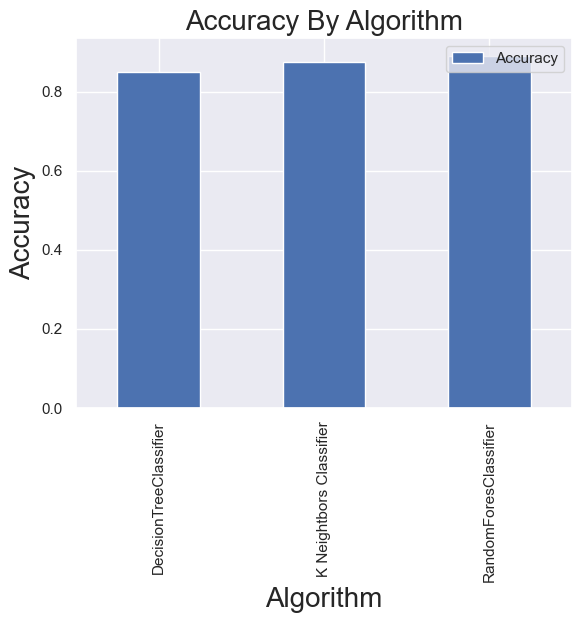

In [161]:
data_df.plot(kind='bar',x = 'Algorithm', y = 'Accuracy')
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Accuracy By Algorithm",fontsize=20)
plt.show()

### Variable Importance Plot

/var/folders/54/937x7kcn6m79plvcfs7pl6zw0000gn/T/ipykernel_36408/1652506768.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


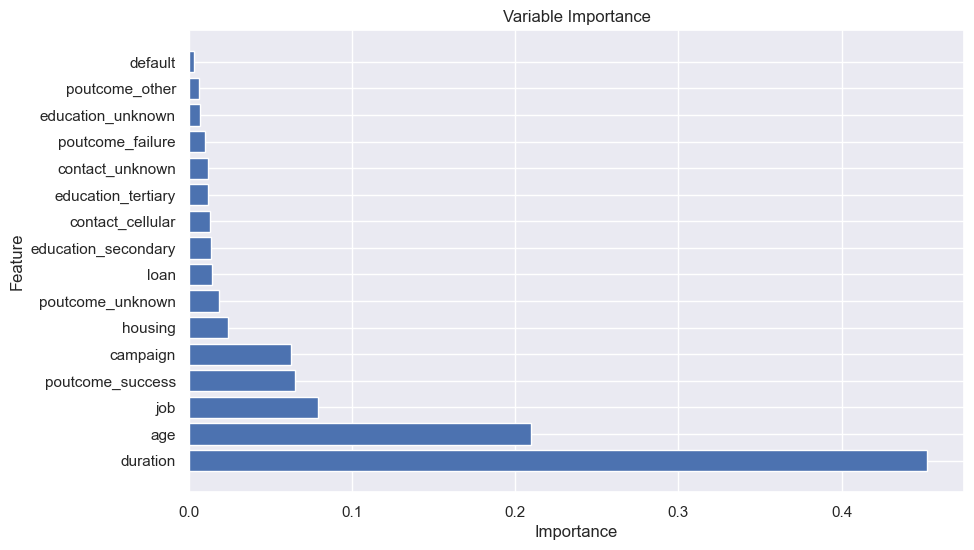

In [162]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
importances = clf.feature_importances_
# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the variable importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Variable Importance')
plt.show()